## Technical Indicators usage for stock markets

#### Testing Alpha Vantage Package for trading

by: Eng. Javier Blanco

### Installing alpha vantage package by PIP

In [1]:
pip install alpha-vantage

Note: you may need to restart the kernel to use updated packages.


### Importing libraries and dependencies

In [2]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt

#### I've gotten an api key from alpha vantage web site 'https://www.alphavantage.co/support/#api-key'

In [3]:
# Api key given
api_key = '9YUGBQ4SDSM881A2'

#### Getting Time Series, calling SMA (SMA = Simple moving average), EMA (EMA =Exponential moving average) and RSI's Indicator (RSI = Relative strength index)
MSFT: Microsoft Ticker,
GOOGL: Google Ticker,
FB: Facebook Ticker

#### Symbols were gotten from NASDAQ convention rules
https://datahub.io/core/nasdaq-listings/r/0.html

In [4]:
period = 60
symbol = 'MSFT'
interval = '60min' #1min, 15min, 30min, 60min

ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_intraday(symbol=symbol, interval=interval, 
                                        outputsize='full')
ti_sma = TechIndicators(key=api_key, output_format ='pandas')
data_ti_sma, meta_data_ti_sma = ti_sma.get_sma(symbol=symbol, interval=interval,
                                  time_period=period, series_type='close')
ti_ema = TechIndicators(key=api_key, output_format='pandas')
data_ti_ema, meta_data_ti_ema = ti_ema.get_ema(symbol=symbol, interval=interval,
                                        time_period=period, series_type='close')
ti_rsi = TechIndicators(key=api_key, output_format='pandas')
data_ti_rsi, meta_data_ti_rsi = ti_rsi.get_rsi(symbol=symbol, interval=interval,
                                        time_period=period, series_type='close')


                          SMA       EMA  4. close
date                                             
2020-06-26 05:00:00       NaN       NaN    200.00
2020-06-26 06:00:00       NaN       NaN    200.32
2020-06-26 07:00:00       NaN       NaN    201.00
2020-06-26 08:00:00       NaN       NaN    200.26
2020-06-26 09:00:00       NaN       NaN    199.80
...                       ...       ...       ...
2020-08-21 16:00:00  211.7734  212.0225       NaN
2020-08-21 17:00:00  211.8276  212.0585       NaN
2020-08-21 18:00:00  211.9059  212.1582       NaN
2020-08-21 19:00:00  211.9733  212.2419       NaN
2020-08-21 20:00:00  212.0453  212.3192       NaN

[639 rows x 3 columns]


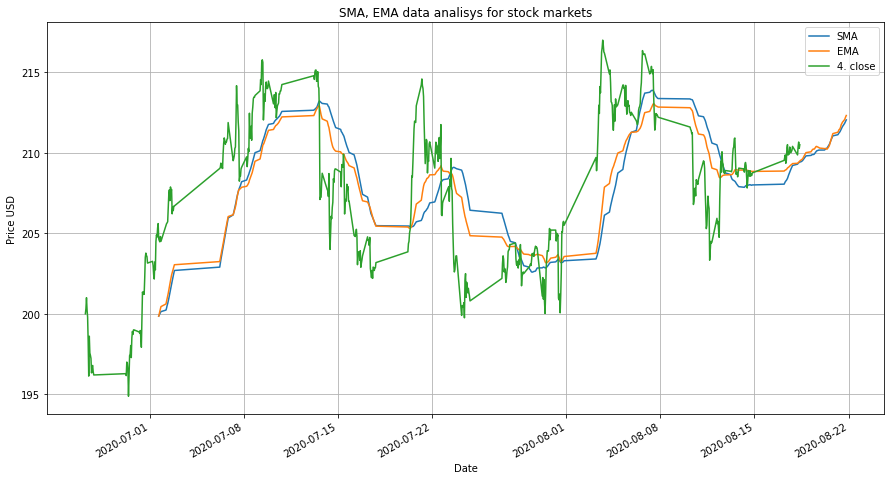

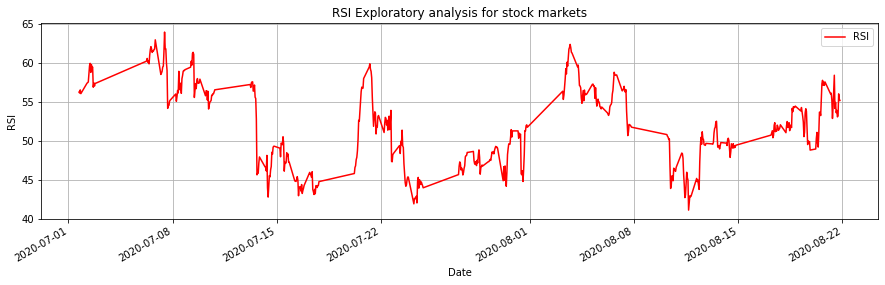

In [5]:
df1 = data_ti_sma
df2 = data_ti_ema
df3 = data_ti_rsi
df4 = data_ts['4. close'].iloc[period-1::]
#df2.index = df1.index

total_df = pd.concat([df1, df2, df4], axis=1)
#total_df1 = pd.DataFrame(total_df)
print(total_df)

ax = total_df.plot(figsize=(15,8))
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.title('SMA, EMA data analisys for stock markets')
plt.grid()
ax2 = df3.plot(figsize=(15,4), color='red')
plt.title('RSI Exploratory analysis for stock markets')
plt.ylabel("RSI")
plt.xlabel("Date")
plt.grid()
plt.show()



